
# Sobre o Conjunto de Dados

### Visão geral do Conjunto de Dados:
O Conjunto de Dados de Saúde e Estilo de Vida do Sono é composto por 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC (Índice de Massa Corporal), pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

### Recursos principais do Conjunto de Dados:
* Métricas abrangentes do sono: Explore a duração, qualidade e fatores que influenciam os padrões de sono.
* Fatores de estilo de vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.
* Saúde cardiovascular: Examine as medições da pressão arterial e frequência cardíaca.
* Análise de distúrbios do sono: Identifique a ocorrência de distúrbios do sono, como insônia e apneia do sono.

### Colunas do Conjunto de Dados:
* __ID da pessoa:__ Um identificador para cada indivíduo.
* __Gênero:__ O gênero da pessoa (Masculino/Feminino).
* __Idade:__ A idade da pessoa em anos.
* __Ocupação:__ A ocupação ou profissão da pessoa.
* __Duração do sono (horas):__ O número de horas que a pessoa dorme por dia.
* __Qualidade do sono (escala: 1-10) :__ Uma avaliação subjetiva da qualidade do sono, variando de 1 a 10.
* __Nível de atividade física (minutos/dia):__ O número de minutos que a pessoa se dedica à atividade física diariamente.
* __Nível de estresse (escala: 1-10):__ Uma avaliação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* __Categoria de IMC:__ A categoria de IMC da pessoa (por exemplo, Abaixo do peso, Normal, Acima do peso).
* __Pressão arterial (sistólica/diastólica):__ A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* __Frequência cardíaca (bpm):__ A frequência cardíaca em repouso da pessoa em batimentos por minuto.
* __Passos diários:__ O número de passos que a pessoa dá por dia.
* __Distúrbio do sono:__ A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do sono).

### Detalhes sobre a coluna Distúrbio do Sono:

* __Nenhum:__ O indivíduo não apresenta nenhum distúrbio do sono específico.
* __Insônia:__ O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono / * * inadequado ou de má qualidade.
* __Apneia do sono:__ O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais para a saúde.

# Analise de dados

In [134]:
import numpy   as np
import warnings
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [256]:
warnings.filterwarnings(action='ignore',category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [20]:
data = pd.read_csv(r'dataset/SleepHealthAndLifestyleDataset.csv',sep=',')

In [21]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


### Função para plotar uma tabela

Tradução das colunas para melhor visualização e compreensão

In [22]:
colunas = ['ID da pessoa','Gênero','Idade' , 'Ocupação', 'Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de atividade física (minutos/dia)','Nível de estresse (escala: 1-10)','Categoria de IMC','Pressão arterial (sistólica/diastólica)','Frequência cardíaca (bpm)','Passos diários','Distúrbio do sono' ]
data.columns = colunas

In [23]:
data.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Pressão arterial (sistólica/diastólica),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [24]:
data['Distúrbio do sono'].loc[data['Distúrbio do sono'].isnull()] = 'Nulo'

### Tratemento dos dados para analise
Para melhor analises dos dados se faz necessário o tratamento dos mesmo.

##### Pressão arterial (sistólica/diastólica)
Dividindo valores de transfomando em colunas 
* Pressão arterial sistólica
* Pressão arterial diastólica

##### Id da pessoa 
E um chave estrangeira , não e boa para fazer analises e nem para a predição do atributo alvo


In [25]:
PressaoArterial = data['Pressão arterial (sistólica/diastólica)']
PressaoArterial = PressaoArterial.reset_index()
PressaoArterial.head(3)

,index,Pressão arterial (sistólica/diastólica)
0,0,126/83
1,1,125/80
2,2,125/80


Dividindo

In [26]:
data[ ['Pressão arterial sistólica','Pressão arterial diastólica']
] = PressaoArterial['Pressão arterial (sistólica/diastólica)'].str.split('/',expand=True)

Convertendo para numeros

In [27]:
data['Pressão arterial diastólica'] = data['Pressão arterial diastólica'].astype(int)
data['Pressão arterial sistólica']  = data['Pressão arterial sistólica'].astype(int)

Id pessoa

In [38]:
idPessoa = data['ID da pessoa'].value_counts().reset_index()
idPessoa.loc[ idPessoa['count']>1 ].any(axis=1)

Series([], dtype: bool)

In [40]:
data.drop(columns=['Pressão arterial (sistólica/diastólica)','ID da pessoa'],inplace=True)

### Voltando para analise

In [89]:
data.shape

(374, 13)

In [224]:
data.describe()

,Idade,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Frequência cardíaca (bpm),Passos diários,Pressão arterial sistólica,Pressão arterial diastólica
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


##### Disturbios do sono

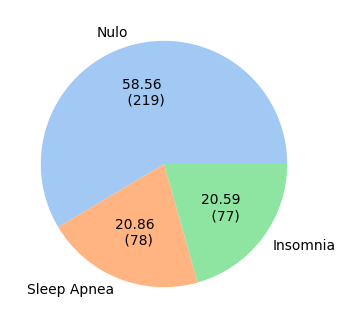

In [73]:
pizza  = data['Distúrbio do sono'].value_counts().reset_index()
plt.figure(figsize=(5,4))
plt.pie(x = pizza['count'],labels=pizza['Distúrbio do sono'],colors=sea.color_palette('pastel'),autopct=lambda x : '{:.2f} \n ({:.0f})'.format(x,(x/100)*pizza['count'].sum()) )
plt.show('Proporção de dados do atributo distúbio do sono')
plt.show()

> Existem mais dados de pessoas que não tem nenhum disturbio do sono , se faz necessrio o balanceamento dos dados

#### gender

In [81]:
genderDistubio = data.groupby(by='Gênero')['Distúrbio do sono'].value_counts().reset_index()

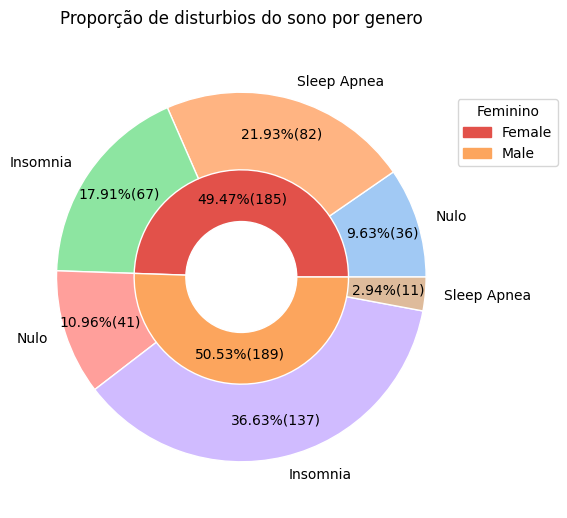

In [223]:
gender  = genderDistubio.groupby(by=['Gênero'])['count'].sum()
genderD = genderDistubio.groupby(by=['Gênero','Distúrbio do sono'])['count'].sum()

colorsG = sea.color_palette('Spectral')[0:2] 
colors  = sea.color_palette('pastel')

fig , ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)

ax.pie( x = gender , radius=0.6 ,wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.7,colors=colorsG,
        autopct=lambda x : '{:.2f}%({:.0f})'.format(x,(x/100)*gender.values.sum()))
ax.pie( x = genderD , labels=genderDistubio['Distúrbio do sono'].values ,wedgeprops=dict(width=0.42, edgecolor='w'),radius=1,pctdistance=0.8,colors=colors,
        autopct=lambda x : '{:.2f}%({:.0f})'.format(x,(x/100)*genderD.values.sum()))

legends = []
for value, color in zip(genderDistubio['Gênero'].unique(), colorsG): 
       legends.append(mpatches.Patch(color=color, label=value))
ax.set_title('Proporção de disturbios do sono por genero',y=1.03)
ax.legend(title='Feminino',handles=legends,bbox_to_anchor=(1.2,0.9,0,0))
plt.show()

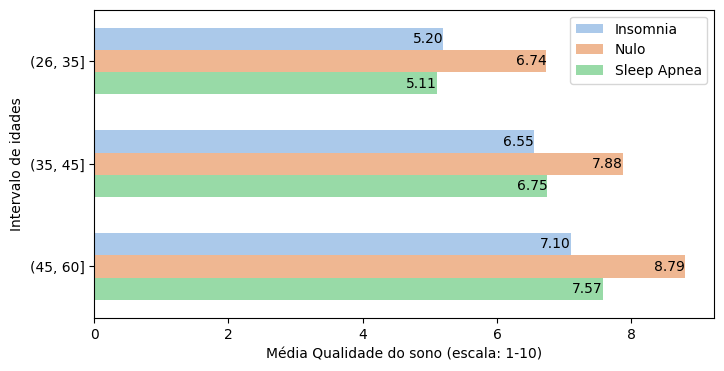

In [266]:
bar = pd.concat([data.drop(columns='Idade'),pd.cut(data['Idade'],bins=[26,35,45,60])],axis=1).groupby( by=['Idade','Distúrbio do sono'] )['Qualidade do sono (escala: 1-10)'].mean().reset_index(name='Média Qualidade do sono (escala: 1-10)')

plt.figure(figsize=(8,4))
plot = sea.barplot(y = bar['Idade'], x=bar['Média Qualidade do sono (escala: 1-10)'],hue=bar['Distúrbio do sono'] , orient='y',width=0.65,palette='pastel')

for p in plot.patches:
    if p.get_width() != 0:
        plt.annotate("%.2f" % p.get_width(), xy = (p.get_width(), p.get_y()+p.get_height()/2), xytext    = (0, 0), textcoords= 'offset points', ha = 'right', va = "center")

plt.legend(bbox_to_anchor=(1,1,0,0))
plt.ylabel('Intervalo de idades')
plt.show()

> Pessoas que não possuem nenhum disturbio na média possuem uma maior qualidade do sono

## Preprocessamento

# Classificação

#### Definindo modelo de teste e treinamento

Para __X__ não serao usados as colunas `['Distúrbio do sono','ID da pessoa']`\
Para __Y__ será usado `['Distúrbio do sono']` 

In [52]:
X = dataset.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = dataset['Distúrbio do sono'].values

In [53]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

## Regressão Logistica

In [54]:
RegressaoLogistica = LogisticRegression(solver='lbfgs',penalty='l2',multi_class='multinomial', max_iter=200)

In [55]:
fitRL= RegressaoLogistica.fit(x_train,y_train) 

/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
y_predictRL = fitRL.predict(x_test)

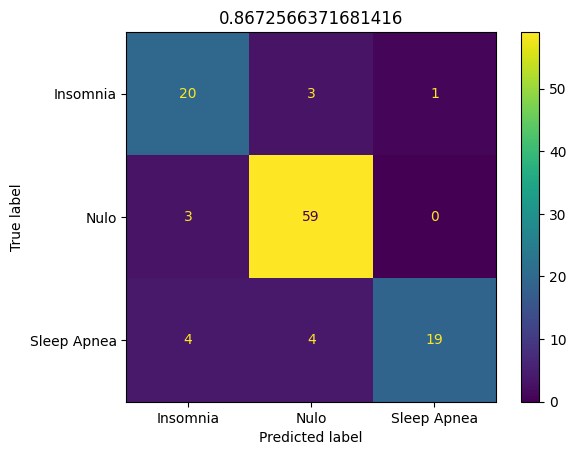

In [57]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictRL),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictRL)}')
plt.show()

## Gaussian

In [58]:
GaussianM = GaussianNB()

In [59]:
fitG = GaussianM.fit(x_train,y_train)

In [60]:
y_predictGM = fitG.predict(x_test)

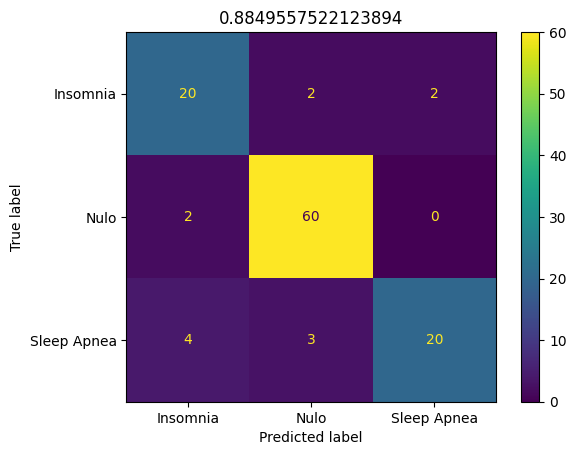

In [61]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictGM),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictGM)}')
plt.show()

## Bernoulli

In [62]:
Bernoulli = BernoulliNB(force_alpha=True)

In [63]:
fitB = Bernoulli.fit(x_train,y_train)

In [64]:
y_predictBER = fitB.predict(x_test)

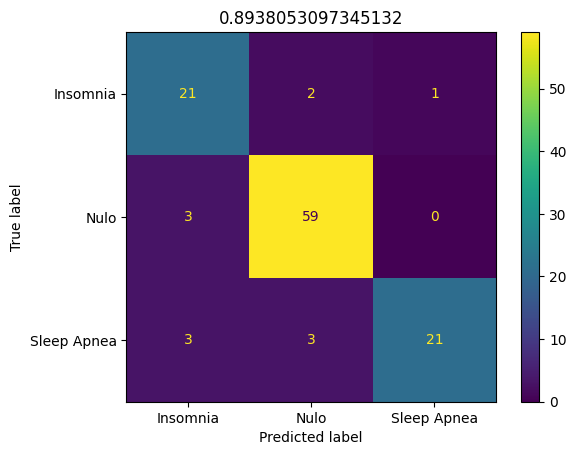

In [65]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictBER),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictBER)}')
plt.show()

## OneVsRestClassifier

In [66]:
OneVS = OneVsRestClassifier(SVC())

In [67]:
fitVS = OneVS.fit(x_train,y_train)

In [68]:
y_predictVS =fitVS.predict(x_test)

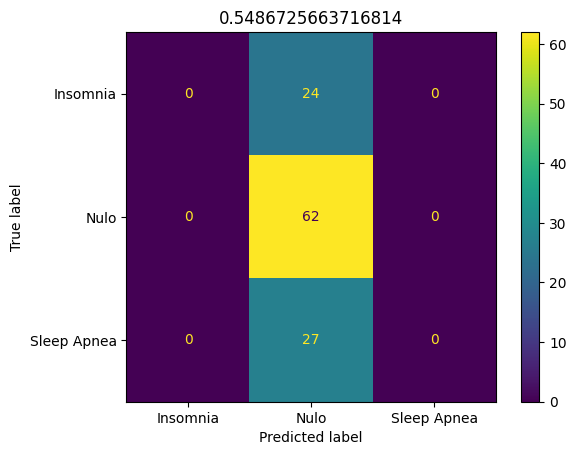

In [69]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictVS),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictVS)}')
plt.show()


# KNN

In [70]:
knn = KNeighborsClassifier()

In [71]:
fitKNN = knn.fit(x_train,y_train) 

In [72]:
y_predictKNN = fitKNN.predict(x_test)

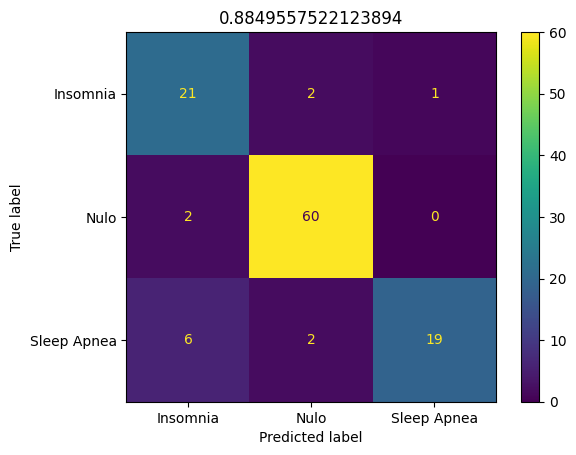

In [73]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_predictKNN),
    display_labels=classesDisturbios
).plot()
plt.title(f'{accuracy_score(y_test,y_predictKNN)}')
plt.show()

# Comparação

In [74]:

for pred,name in [(y_predictRL,'REGRESSAO LOGISTICA'),(y_predictGM,'Gaussian Multinomial'),(y_predictVS,'ONE'),(y_predictKNN,'KNN')]:
    print(name)
    print(classification_report(y_test,pred),'\n')

REGRESSAO LOGISTICA
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.89      0.95      0.92        62
           2       0.95      0.70      0.81        27

    accuracy                           0.87       113
   macro avg       0.86      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113
 

Gaussian Multinomial
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.92      0.97      0.94        62
           2       0.91      0.74      0.82        27

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.85       113
weighted avg       0.89      0.88      0.88       113
 

ONE
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.55      1.00      0.71        62
           2       0.00   

/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [75]:
pd.DataFrame({
    'Regressao Logistica  ':accuracy_score(y_test,y_predictRL)*100,
    'Gaussian Multinomial ':accuracy_score(y_test,y_predictGM)*100,
    'Bernoulli            ':accuracy_score(y_test,y_predictBER)*100,
    'One                  ':accuracy_score(y_test,y_predictVS)*100,
    'KNN                  ':accuracy_score(y_test,y_predictKNN)*100

},index=['accuracy_score']).T

,accuracy_score
Regressao Logistica,86.725664
Gaussian Multinomial,88.495575
Bernoulli,89.380531
One,54.867257
KNN,88.495575


# Resultados
Bernoulli obteve melhor resultado

# Ideia / teste

Nas coluna disturbio do sono, possuem 3 classes  ['Insomnia', 'Nulo', 'Sleep Apnea'] e possuem 2 classes que mostra qual disturbio o individuo sofre ('Insomnia', 'Sleep Apnea') vou definir elas de como uma unica classes chamada disturbio , afim de aumentar minha acuracia e classficação.

In [76]:
classesDisturbios

array(['Insomnia', 'Nulo', 'Sleep Apnea'], dtype=object)

In [77]:
datasetT1 = copy.deepcopy(dataset)

In [78]:
datasetT1.loc[datasetT1['Distúrbio do sono'] == 0] = 2

In [79]:
datasetT1['Distúrbio do sono'].value_counts()

Distúrbio do sono
1    219
2    155
Name: count, dtype: int64

In [80]:
X = datasetT1.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = datasetT1['Distúrbio do sono'].values

In [81]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [82]:
RegressaoLogistica = LogisticRegression()

In [83]:
predR1 = RegressaoLogistica.fit(x_train,y_train).predict(x_test)

/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


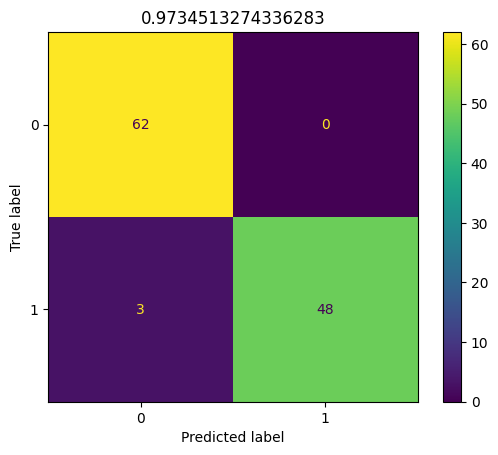

In [84]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,predR1),
).plot()
plt.title(f'{accuracy_score(y_test,predR1)}')
plt.show()

In [85]:
print(classification_report(y_test,predR1))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        62
           2       1.00      0.94      0.97        51

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



# Ideia/teste

Removendo todos os nulos para e so utilzando para classicação os disturbios

In [86]:
datasetT2 = copy.deepcopy(dataset)

In [87]:
datasetT2.drop(
    datasetT2.loc[datasetT2['Distúrbio do sono'] == 1].index,inplace=True
)

In [88]:
X = datasetT2.drop(columns=['Distúrbio do sono','ID da pessoa']).values
Y = datasetT2['Distúrbio do sono'].values

In [89]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [90]:
pred = RegressaoLogistica.fit(x_train,y_train).predict(x_test)

/home/mateus/MEGA/Projetos/ClassficacaoDisturbioSono/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


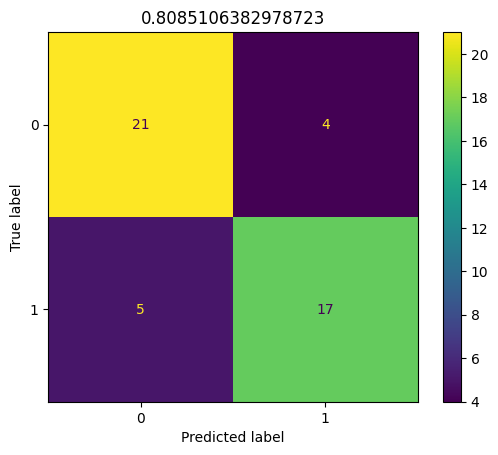

In [91]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test,pred),
).plot()
plt.title(f'{accuracy_score(y_test,pred)}')
plt.show()